<a href="https://colab.research.google.com/github/AswinSamay9866/ML-Project/blob/main/BikeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import os
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filePath = "/content/drive/MyDrive/Project Data files/bike rental data/hour.csv"
bikesData = pd.read_csv(filePath)
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bikesData.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
lol = pd.Series(data = bikesData.groupby('dteday').casual.sum())
lol.iloc[1:9]

dteday
2011-01-02    131
2011-01-03    120
2011-01-04    108
2011-01-05     82
2011-01-06     88
2011-01-07    148
2011-01-08     68
2011-01-09     54
Name: casual, dtype: int64

In [ ]:
bikesData.hr.value_counts(sort = False)

0     726
16    730
1     724
17    730
2     715
18    728
3     697
19    728
4     697
20    728
5     717
21    728
6     725
22    728
7     727
23    728
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
Name: hr, dtype: int64

In [ ]:
def plot(col,df,scale=2500000.0):
    d=dict(df.groupby(col)['cnt'].sum())
    plt.figure(figsize=(10,5))
    plt.bar(d.keys(),d.values())
    plt.ylim(0, scale)
    plt.ticklabel_format(style='plain')
    plt.show()

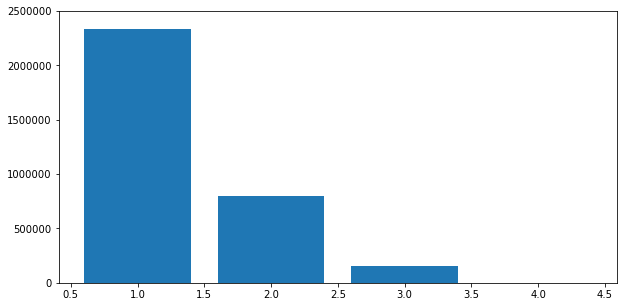

In [ ]:
plot('weathersit',bikesData)

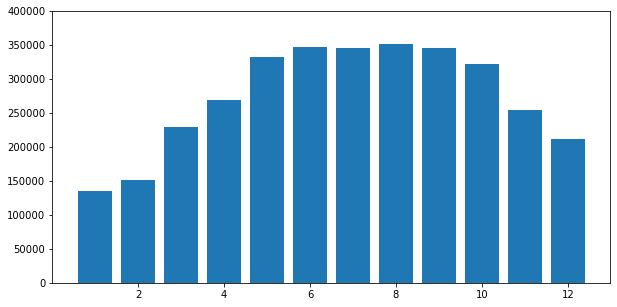

In [ ]:
plot('mnth',bikesData,400000)

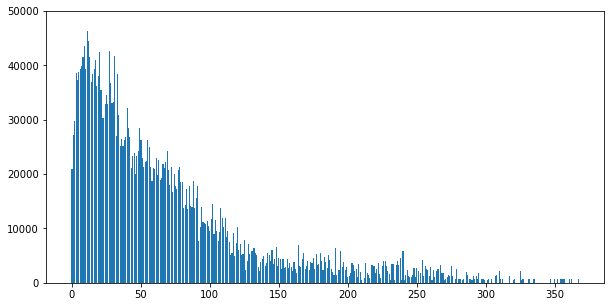

In [ ]:
plot('casual',bikesData,50000)

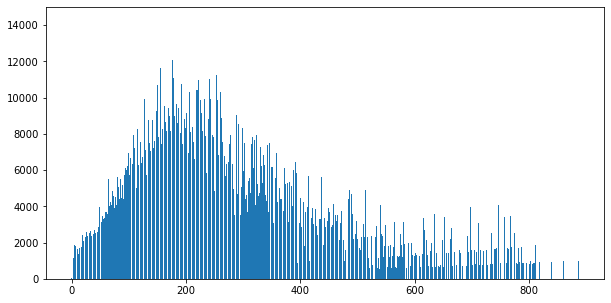

In [ ]:
plot('registered',bikesData,15000)

In [ ]:
df=pd.DataFrame([bikesData['casual'].sum(),bikesData['registered'].sum()],columns=['count'])
df['col']=['casual','registered']
df

,count,col
0,620017,casual
1,2672662,registered


In [ ]:
df['col'].values

array(['casual', 'registered'], dtype=object)

<BarContainer object of 2 artists>

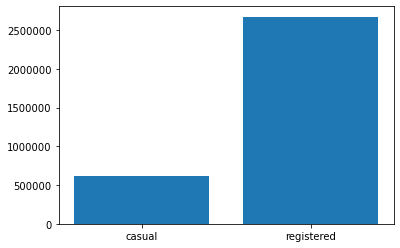

In [ ]:
plt.ticklabel_format(style='plain')
plt.bar(df['col'].values,df['count'].values)

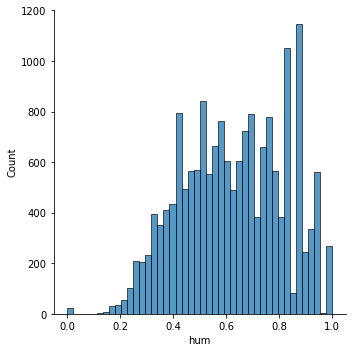

In [ ]:
sns.displot(data=bikesData,x='hum',kind='hist')

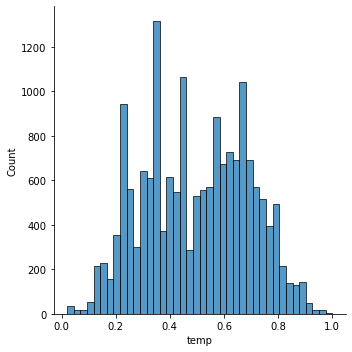

In [ ]:
sns.displot(data=bikesData,x='temp',kind='hist')

In [ ]:
import scipy.stats as stats
import pylab

In [ ]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.show()

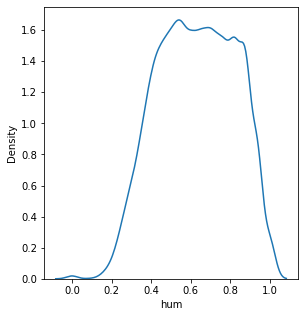

In [ ]:
normality(bikesData,'hum')

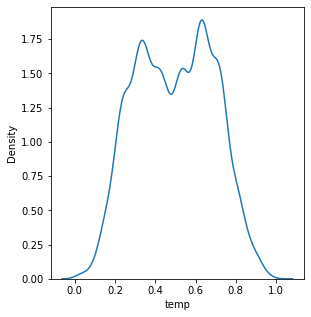

In [ ]:
normality(bikesData,'temp')

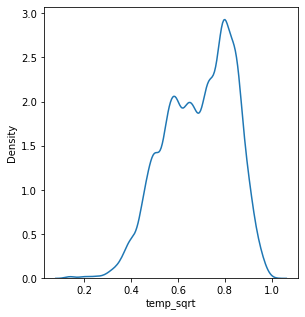

In [ ]:
bikesData['temp_sqrt'] = np.sqrt(bikesData['temp'])
normality(bikesData,'temp_sqrt')

In [ ]:
bikesData.drop('temp',axis=1,inplace=True)

In [ ]:
bikesData

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,temp_sqrt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,0.0000,3,13,16,0.489898
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,0.0000,8,32,40,0.469042
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,0.80,0.0000,5,27,32,0.469042
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,0.75,0.0000,3,10,13,0.489898
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0.75,0.0000,0,1,1,0.489898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.2576,0.60,0.1642,11,108,119,0.509902
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.2576,0.60,0.1642,8,81,89,0.509902
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.2576,0.60,0.1642,7,83,90,0.509902
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.2727,0.56,0.1343,13,48,61,0.509902


<BarContainer object of 17379 artists>

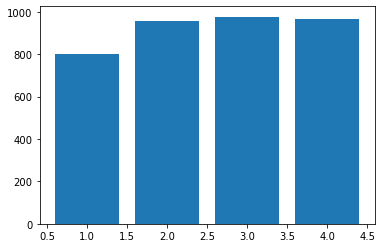

In [ ]:
plt.bar(bikesData.season , bikesData.cnt)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

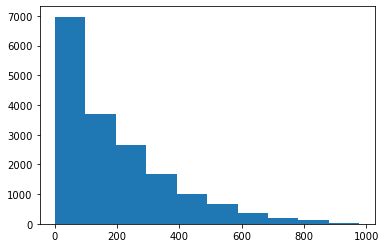

In [ ]:
plt.hist(bikesData.cnt)

In [ ]:
bikesData.shape

(17379, 17)

In [ ]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,temp_sqrt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.689986
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.144593
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.141421
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.583095
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.707107
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.812404
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


In [ ]:
bikesData.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

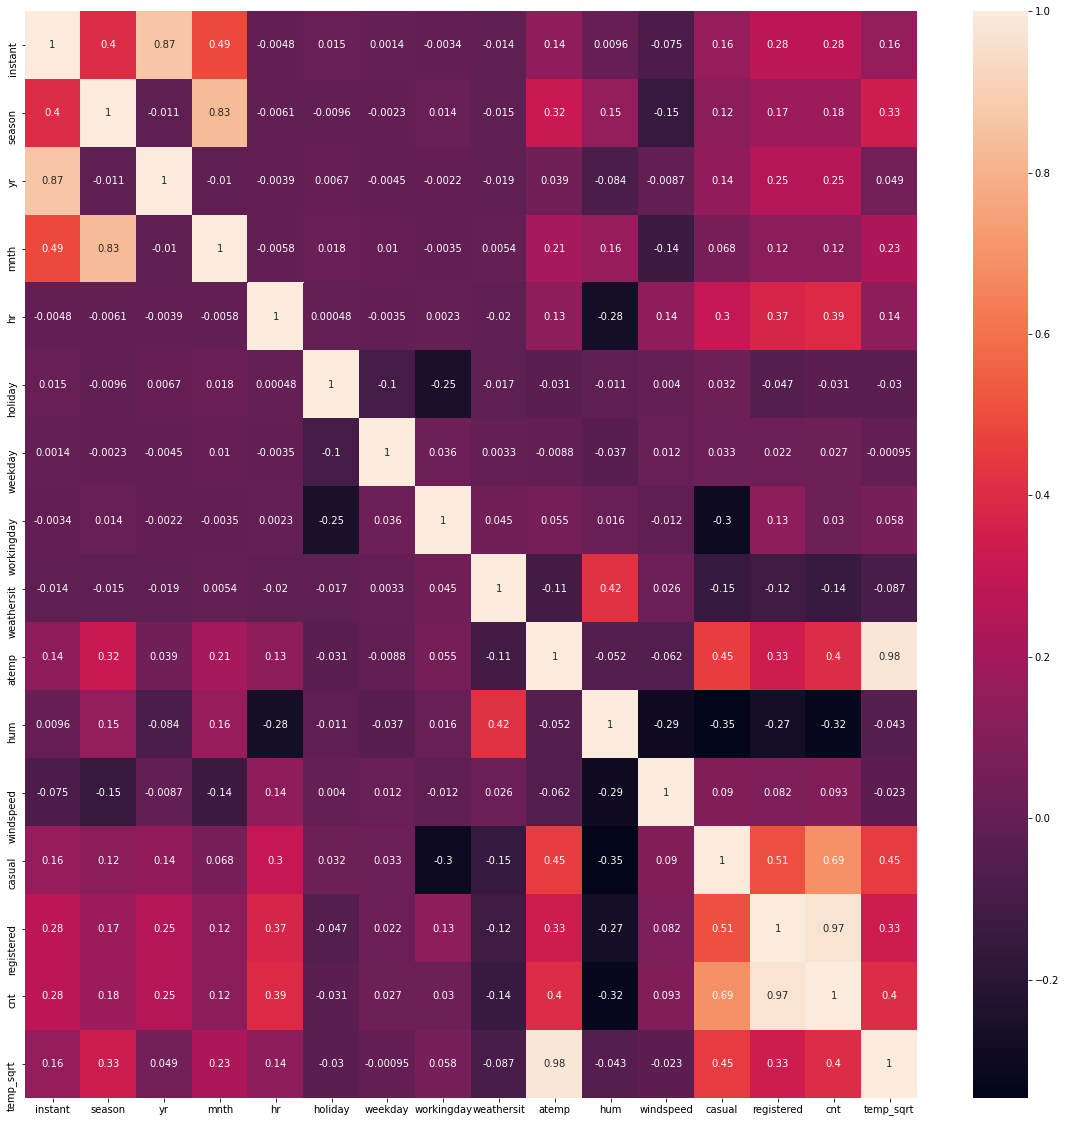

In [ ]:
corrmat = bikesData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bikesData[top_corr_features].corr(),annot=True)

In [ ]:
# columnsToDrop = ['instant','casual','registered','atemp','dteday']

# bikesData = bikesData.drop(columnsToDrop, axis = 1)
# bikesData.head(10)

In [ ]:
columnsToDrop = ['holiday','weekday','workingday','windspeed']

bikesData = bikesData.drop(columnsToDrop, axis = 1)
bikesData.head(10)

,instant,dteday,season,yr,mnth,hr,weathersit,atemp,hum,casual,registered,cnt,temp_sqrt
0,1,2011-01-01,1,0,1,0,1,0.2879,0.81,3,13,16,0.489898
1,2,2011-01-01,1,0,1,1,1,0.2727,0.80,8,32,40,0.469042
2,3,2011-01-01,1,0,1,2,1,0.2727,0.80,5,27,32,0.469042
3,4,2011-01-01,1,0,1,3,1,0.2879,0.75,3,10,13,0.489898
4,5,2011-01-01,1,0,1,4,1,0.2879,0.75,0,1,1,0.489898
5,6,2011-01-01,1,0,1,5,2,0.2576,0.75,0,1,1,0.489898
6,7,2011-01-01,1,0,1,6,1,0.2727,0.80,2,0,2,0.469042
7,8,2011-01-01,1,0,1,7,1,0.2576,0.86,1,2,3,0.447214
8,9,2011-01-01,1,0,1,8,1,0.2879,0.75,1,7,8,0.489898
9,10,2011-01-01,1,0,1,9,1,0.3485,0.76,8,6,14,0.565685


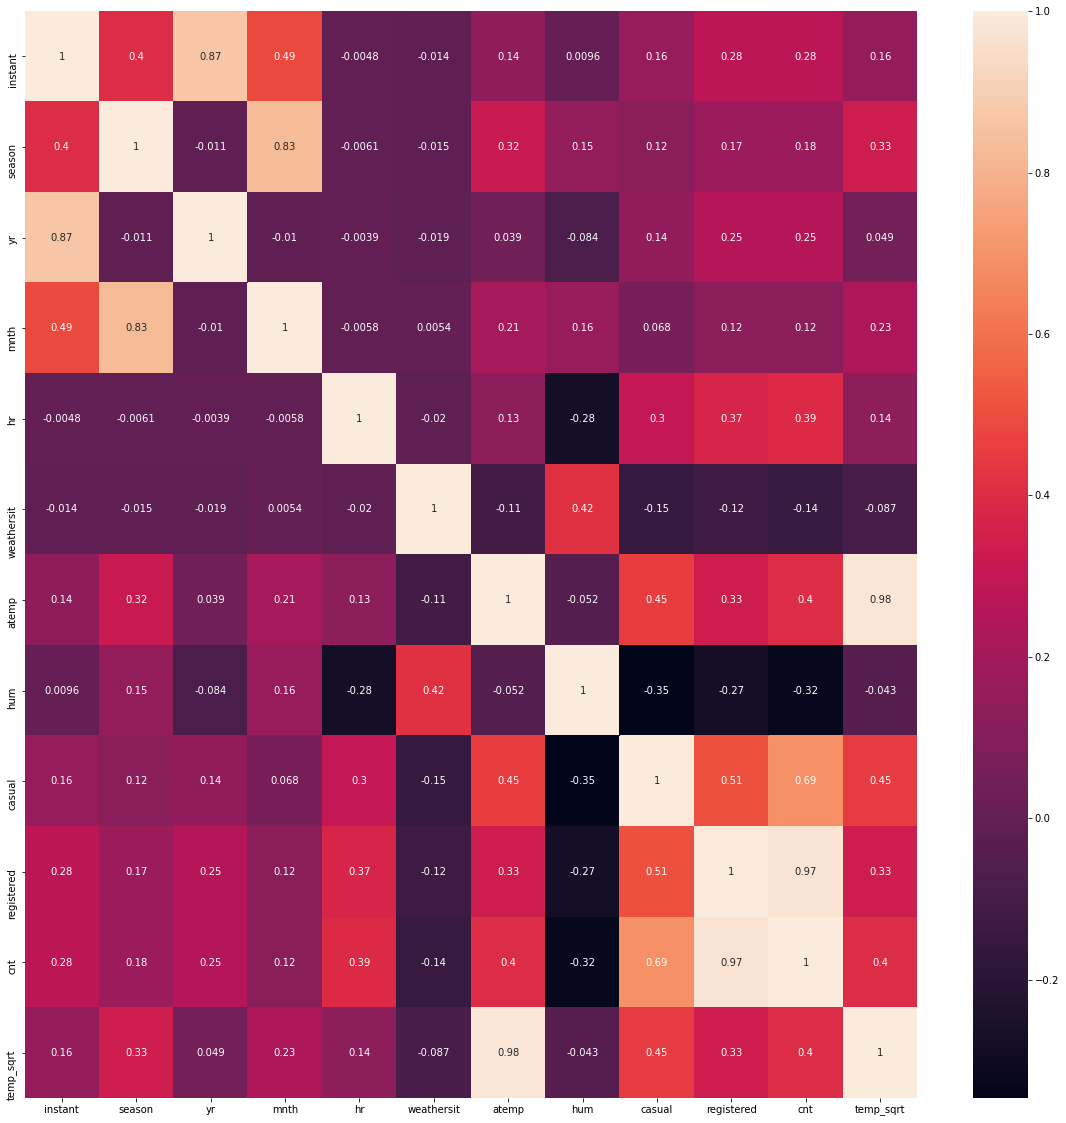

In [ ]:
corrmat = bikesData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bikesData[top_corr_features].corr(),annot=True)

In [ ]:
# instant is highly correlated with year
# season is highly correlated with month
# temp is highly correlated with atemp

In [ ]:
bikesData.instant.value_counts(sort=True)

2049     1
3387     1
15645    1
9502     1
11551    1
        ..
10896    1
8849     1
14994    1
12947    1
2047     1
Name: instant, Length: 17379, dtype: int64

In [ ]:
bikesData.season.value_counts(sort=True)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [ ]:
bikesData.mnth.value_counts(sort=True)

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

In [ ]:
# Drop instant, atemp columns

In [ ]:
columnsToDrop = ['instant','atemp']

bikesData = bikesData.drop(columnsToDrop, axis = 1)
bikesData.head(10)

,dteday,season,yr,mnth,hr,weathersit,hum,casual,registered,cnt,temp_sqrt
0,2011-01-01,1,0,1,0,1,0.81,3,13,16,0.489898
1,2011-01-01,1,0,1,1,1,0.80,8,32,40,0.469042
2,2011-01-01,1,0,1,2,1,0.80,5,27,32,0.469042
3,2011-01-01,1,0,1,3,1,0.75,3,10,13,0.489898
4,2011-01-01,1,0,1,4,1,0.75,0,1,1,0.489898
5,2011-01-01,1,0,1,5,2,0.75,0,1,1,0.489898
6,2011-01-01,1,0,1,6,1,0.80,2,0,2,0.469042
7,2011-01-01,1,0,1,7,1,0.86,1,2,3,0.447214
8,2011-01-01,1,0,1,8,1,0.75,1,7,8,0.489898
9,2011-01-01,1,0,1,9,1,0.76,8,6,14,0.565685


In [ ]:
# we are not dropping season or mnth column to show various insights like in which month more count of rentals happened in a 
# particular season

In [ ]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
bikesData.head()

,dteday,season,yr,mnth,hr,weathersit,hum,casual,registered,cnt,temp_sqrt,dayCount
0,2011-01-01,1,0,1,0,1,0.81,3,13,16,0.489898,0.000000
1,2011-01-01,1,0,1,1,1,0.80,8,32,40,0.469042,0.041667
2,2011-01-01,1,0,1,2,1,0.80,5,27,32,0.469042,0.083333
3,2011-01-01,1,0,1,3,1,0.75,3,10,13,0.489898,0.125000
4,2011-01-01,1,0,1,4,1,0.75,0,1,1,0.489898,0.166667


In [ ]:
bikesData.drop('dteday',axis=1,inplace=True)
bikesData

,season,yr,mnth,hr,weathersit,hum,casual,registered,cnt,temp_sqrt,dayCount
0,1,0,1,0,1,0.81,3,13,16,0.489898,0.000000
1,1,0,1,1,1,0.80,8,32,40,0.469042,0.041667
2,1,0,1,2,1,0.80,5,27,32,0.469042,0.083333
3,1,0,1,3,1,0.75,3,10,13,0.489898,0.125000
4,1,0,1,4,1,0.75,0,1,1,0.489898,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.60,11,108,119,0.509902,723.916667
17375,1,1,12,20,2,0.60,8,81,89,0.509902,723.958333
17376,1,1,12,21,1,0.60,7,83,90,0.509902,724.000000
17377,1,1,12,22,1,0.56,13,48,61,0.509902,724.041667


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(bikesData.drop('cnt',axis=1),bikesData['cnt'], test_size=0.3, random_state=42)

print(len(X_train),"train +", len(X_test), "test")

# train_set.sort_values('dayCount', axis= 0, inplace=True)
# test_set.sort_values('dayCount', axis= 0, inplace=True)

12165 train + 5214 test


In [ ]:
X_train

,season,yr,mnth,hr,weathersit,hum,casual,registered,temp_sqrt,dayCount
11229,2,1,4,2,2,0.42,1,8,0.707107,467.875000
6334,4,0,9,12,2,0.79,48,161,0.824621,263.916667
11060,2,1,4,0,1,0.36,8,22,0.583095,460.833333
12346,2,1,6,15,1,0.34,236,408,0.836660,514.416667
15437,4,1,10,10,1,0.52,27,190,0.748331,643.208333
...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,1,0.88,30,329,0.678233,470.166667
11964,2,1,5,17,1,0.34,124,688,0.812404,498.500000
5390,3,0,8,12,1,0.43,26,163,0.894427,224.583333
860,1,0,2,7,1,0.65,3,97,0.489898,35.833333


In [ ]:
X_test

,season,yr,mnth,hr,weathersit,hum,casual,registered,temp_sqrt,dayCount
12830,3,1,6,19,1,0.27,185,240,0.894427,534.583333
8688,1,1,1,20,1,0.41,5,83,0.489898,362.000000
7091,4,0,10,2,1,0.66,1,3,0.565685,295.458333
12230,2,1,5,19,1,0.52,69,457,0.883176,509.583333
431,1,0,1,0,1,0.56,5,8,0.509902,17.958333
...,...,...,...,...,...,...,...,...,...,...
12749,2,1,6,10,1,0.52,41,126,0.905539,531.208333
11476,2,1,4,9,2,0.37,45,169,0.616441,478.166667
12847,3,1,6,12,1,0.33,227,329,0.894427,535.291667
16721,4,1,12,12,1,0.68,39,273,0.721110,696.708333


In [ ]:
y_train

11229      9
6334     209
11060     30
12346    644
15437    217
        ... 
11284    359
11964    812
5390     189
860      100
15795    779
Name: cnt, Length: 12165, dtype: int64

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
# columnsToScale = ["temp","hum"]
# scaler = StandardScaler()
# train_set[columnsToScale]=scaler.fit_transform(train_set[columnsToScale])
# test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
# train_set[columnsToScale].describe()

In [ ]:
# No need to perform Scaling as the max and min values for temp and hum are both 0 and 1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# trainingCols = train_set.drop(['cnt'], axis =1)
# trainingLabels = train_set['cnt']

In [ ]:
dec_reg = DecisionTreeRegressor(random_state= 42)
dt_mae_scores = -cross_val_score(dec_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")

display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))

display_scores(dt_mse_scores)

Scores: [2.41002465 2.46425637 2.48644207 2.326212   2.70254725 2.85115132
 2.52138158 2.71546053 2.53207237 2.50657895]
Mean: 2.5516127070449337
Standard deviation: 0.15013510801975355
Scores: [4.73479055 4.56136827 5.15798079 4.89856015 6.50889032 8.8686968
 4.9260986  5.90787276 6.51699448 5.0534967 ]
Mean: 5.713474942816142
Standard deviation: 1.248395383025547


In [ ]:
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg, X_train, y_train, cv =10,scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, X_train, y_train, cv =10,scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [1.89450208e-13 2.17240085e-13 1.82855648e-13 3.25680686e-13
 1.72596713e-13 2.55246664e-13 1.95231623e-13 2.43926681e-13
 1.98979722e-13 2.39392570e-13]
Mean: 2.220600600185808e-13
Standard deviation: 4.3519949520627236e-14
Scores: [2.34708475e-13 2.79363878e-13 2.31502034e-13 3.70515993e-13
 2.14099324e-13 3.34949089e-13 2.45152314e-13 3.16124414e-13
 2.47318548e-13 2.98117363e-13]
Mean: 2.771851430725795e-13
Standard deviation: 4.8780777456971756e-14
